## Partial Dependence Plot

In [43]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing

%matplotlib inline

In [44]:
cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

print("Training GBRT...")
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)
print(" done.")

Training GBRT...
 done.


In [45]:
names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Partial Dependence Plots
Custom 3d plot via ``partial_dependence``


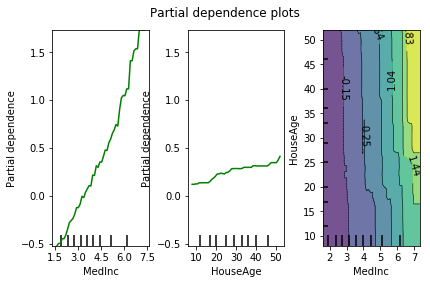

In [48]:
print('Partial Dependence Plots')

features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)

fig.suptitle('Partial dependence plots')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

print('Custom 3d plot via ``partial_dependence``')
plt.show()

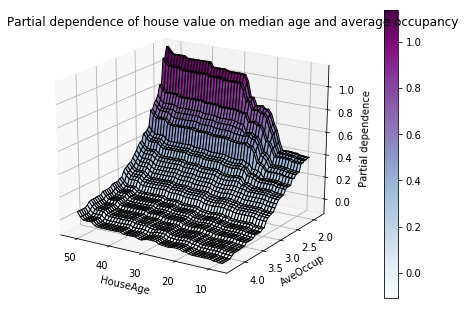

In [49]:
fig = plt.figure()
target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature, X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')

ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median age and average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()